In [2]:
import numpy as np 
import pandas as pd 

!conda install -c conda-forge lxml
!conda install -c conda-forge geopy

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    lxml-4.5.2                 |   py36h17c4326_0         1.3 MB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.8 MB

The following NEW packages will be INSTALLED:

    python_abi:      3.6-1_cp36m          conda-forge

The following packages will be UPDATED:

    certifi:         2020.6.20-py36_0                 --

In [3]:
!pip install folium==0.5.0
import requests
from bs4 import BeautifulSoup
import os
from sklearn.cluster import KMeans
import folium 
from geopy.geocoders import Nominatim  # module to convert an address into latitude and longitude values
import matplotlib.cm as cm
import matplotlib.colors as colors
from pandas.io.json import json_normalize
import seaborn as sns
from matplotlib import pyplot as plt

     |████████████████████████████████| 81kB 5.9MB/s eta 0:00:011
  Stored in directory: /home/dsxuser/.cache/pip/wheels/f8/98/ff/954791afc47740d554f0d9e5885fa09dd60c2265d42578e665
Successfully built folium


### 1.Scrape Wards information from Wiki

In [5]:
df = pd.read_html('https://en.wikipedia.org/wiki/Osaka')[4] #extract the fourth table in Osaka Wiki (Ward of Osaka)

In [6]:
df.head()

Wards of Osaka                                           \
  Unnamed: 0_level_1      Place Name       Unnamed: 3_level_1   
  Unnamed: 0_level_2          Rōmaji Kanji         Population   
0                  1        Abeno-ku  阿倍野区             107000   
1                  2        Asahi-ku    旭区              90854   
2                  3         Chūō-ku   中央区             100998   
3                  4    Fukushima-ku   福島区              78348   
4                  5  Higashinari-ku   東成区              83684   

                                                              
  Unnamed: 4_level_1   Unnamed: 5_level_1       Map of Osaka  
    Land area in km2 Pop. density per km2 Unnamed: 6_level_2  
0               5.99                18440                NaN  
1               6.32                14376                NaN  
2               8.87                11386                NaN  
3               4.67                16777                NaN  
4               4.54                18433                NaN

In [316]:
# columns = ['id', 'Place Name Romaji', 'Place Name Kanji', 'Population', 'Land area in km2', 'Pop. density per km2', 'Map of Osaka']

### 1.1 Modify Dataframe column names

In [7]:
df.columns = df.columns.droplevel()
df.columns = df.columns.droplevel() #drop on multiple level column names
del df['Unnamed: 6_level_2']

In [8]:
df = df.rename({'Unnamed: 0_level_2':'ID', 'Rōmaji':'Neighbourhood', 'Kanji':'Kanji'},axis=1) #rename column names

### 1.2 Input Latitude and Longitude information 

In [9]:
geolocator = Nominatim(user_agent="Osaka_travel")
df['Ward_Coordination']= df['Kanji'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Ward_Coordination'].apply(pd.Series)
df.drop(['Ward_Coordination'], axis=1, inplace=True)

In [10]:
df

,ID,Neighbourhood,Kanji,Population,Land area in km2,Pop. density per km2,Latitude,Longitude
0,1,Abeno-ku,阿倍野区,107000,5.99,18440,34.627501,135.514095
1,2,Asahi-ku,旭区,90854,6.32,14376,34.726483,135.546952
2,3,Chūō-ku,中央区,100998,8.87,11386,35.666255,139.775565
3,4,Fukushima-ku,福島区,78348,4.67,16777,34.692104,135.474812
4,5,Higashinari-ku,東成区,83684,4.54,18433,34.672912,135.550567
5,6,Higashisumiyoshi-ku,東住吉区,126704,9.75,12995,34.615662,135.531096
6,7,Higashiyodogawa-ku,東淀川区,176943,13.27,13334,34.740212,135.517432
7,8,Hirano-ku,平野区,193282,15.28,12649,34.603715,135.559027
8,9,Ikuno-ku,生野区,129641,8.37,15489,34.653003,135.547722
9,10,Jōtō-ku,城東区,167925,8.38,20039,34.693887,135.547769


###  2. Get Osaka's geographical coordinates

In [11]:
address = 'Osaka'
geolocator = Nominatim(user_agent="Osaka_travel")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Osaka are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Osaka are 34.6198813, 135.490357.


### 2.1 Create map preview of Osaka

In [12]:
map_osaka_preview = folium.Map(location=[latitude, longitude], zoom_start=11.5)

 # add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='Green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.6,
        parse_html=False).add_to(map_osaka_preview) 
    
map_osaka_preview

### 2.2 Import latitude and longitude information using Foursquare Api

In [14]:
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value
neighborhood_name = df.loc[0, 'Neighbourhood'] # neighborhood name

CLIENT_ID = 'QEZC2RY3XRB50BMMPFJUU4TQJ33HM4RA1O0DXJBIHVT5PEPD' # your Foursquare ID
CLIENT_SECRET = 'AJO3OCSX1WRSCAOVY0GLM5JE3L4F50YFFBNPSP4NW01UR2AC' # your Foursquare Secret
VERSION = '20200731'
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()

#### Let's try with Abeno-ku first!

In [15]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [16]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Usagi to Boku (うさぎとぼく),Coffee Shop,34.629734,135.515104
1,ライフ セントラルスクエア 北畠店,Supermarket,34.626273,135.509131
2,7-Eleven (セブンイレブン 大阪阪南町3丁目店),Convenience Store,34.628868,135.514661
3,FamilyMart (ファミリーマート 阿倍野昭和町店),Convenience Store,34.627117,135.516143
4,モスバーガー 昭和町店,Fast Food Restaurant,34.630623,135.516397


### 2.3 Import all venue latitudes and longitudes with Foursquare API

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [18]:
Osaka_venues = getNearbyVenues(names=df['Neighbourhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Abeno-ku
Asahi-ku
Chūō-ku
Fukushima-ku
Higashinari-ku
Higashisumiyoshi-ku
Higashiyodogawa-ku
Hirano-ku
Ikuno-ku
Jōtō-ku
Kita-ku (administrative center)
Konohana-ku
Minato-ku
Miyakojima-ku
Naniwa-ku
Nishi-ku
Nishinari-ku
Nishiyodogawa-ku
Suminoe-ku
Sumiyoshi-ku
Taishō-ku
Tennōji-ku
Tsurumi-ku
Yodogawa-ku


In [19]:
Osaka_Filter_restaurant = Osaka_venues[Osaka_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Osaka_Filter_restaurant.index = np.arange(1, len(Osaka_Filter_restaurant )+1)

In [20]:
print (Osaka_Filter_restaurant['Venue Category'].value_counts())

Japanese Restaurant          30
Sushi Restaurant             23
Ramen Restaurant             20
Chinese Restaurant           19
Donburi Restaurant           15
Fast Food Restaurant         14
Japanese Curry Restaurant    10
Italian Restaurant            8
Soba Restaurant               6
Restaurant                    6
Udon Restaurant               5
Yakitori Restaurant           4
French Restaurant             4
Tempura Restaurant            3
Indian Restaurant             3
Dumpling Restaurant           2
Unagi Restaurant              2
Kushikatsu Restaurant         2
Seafood Restaurant            2
Spanish Restaurant            2
Sri Lankan Restaurant         1
Yoshoku Restaurant            1
Kebab Restaurant              1
Tonkatsu Restaurant           1
Halal Restaurant              1
Kosher Restaurant             1
Vietnamese Restaurant         1
Kaiseki Restaurant            1
German Restaurant             1
Korean Restaurant             1
Name: Venue Category, dtype: int64


In [21]:
print('There are {} uniques restaurant categories.'.format(len(Osaka_Filter_restaurant['Venue Category'].unique())))

There are 30 uniques restaurant categories.


### 2.4 Visualize restaurant categories in Osaka

In [22]:
# create a dataframe of top 10 restaurant categories in Osaka 
Osaka_RestCat_Top10 = Osaka_Filter_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Osaka_RestCat_Top10 = Osaka_RestCat_Top10.reset_index()
Osaka_RestCat_Top10.rename(index=str, columns={"index": "Restaurant_Category", "frequency": "Frequency"}, inplace=True)
Osaka_RestCat_Top10

,Restaurant_Category,Frequency
0,Japanese Restaurant,30
1,Sushi Restaurant,23
2,Ramen Restaurant,20
3,Chinese Restaurant,19
4,Donburi Restaurant,15
5,Fast Food Restaurant,14
6,Japanese Curry Restaurant,10
7,Italian Restaurant,8
8,Soba Restaurant,6
9,Restaurant,6


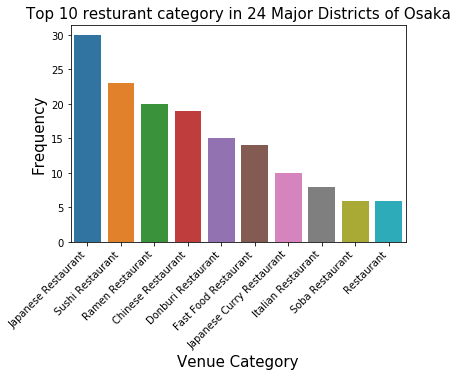

<Figure size 1296x504 with 0 Axes>

In [58]:
s=sns.barplot(x="Restaurant_Category", y="Frequency", data=Osaka_RestCat_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Top 10 resturant category in 24 Major Districts of Osaka', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

### 2.5 Group result by Neighbourhood

In [24]:
Osaka_restaurant = Osaka_Filter_restaurant.groupby(['Neighbourhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())

In [25]:
Osaka_restaurant

Neighbourhood
Abeno-ku                            1
Asahi-ku                            5
Chūō-ku                            59
Fukushima-ku                       21
Higashisumiyoshi-ku                 5
Higashiyodogawa-ku                 14
Hirano-ku                           1
Ikuno-ku                            4
Jōtō-ku                             4
Kita-ku (administrative center)    14
Minato-ku                          11
Miyakojima-ku                      13
Naniwa-ku                           5
Nishi-ku                            9
Nishinari-ku                        4
Nishiyodogawa-ku                    3
Suminoe-ku                          4
Sumiyoshi-ku                        1
Taishō-ku                           6
Tennōji-ku                          3
Yodogawa-ku                         3
Name: Venue Category, dtype: int64

In [26]:
Osaka_restaurant_df  = Osaka_restaurant.to_frame().reset_index()
Osaka_restaurant_df.columns = ['Neighbourhood', 'Number of Restaurant']
Osaka_restaurant_df.index = np.arange(1, len(Osaka_restaurant_df)+1)
list_rest_no =Osaka_restaurant_df['Number of Restaurant'].to_list()
list_dist =Osaka_restaurant_df['Neighbourhood'].to_list()

In [27]:
Osaka_onehot = pd.get_dummies(Osaka_Filter_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
Osaka_onehot['Neighbourhood'] = Osaka_Filter_restaurant['Neighbourhood'] 
cols = Osaka_onehot.columns.tolist()
cols = cols[-1:] + cols[:-1]
Osaka_onehot = Osaka_onehot[cols]
Osaka_onehot.head()

,Neighbourhood,Chinese Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Halal Restaurant,Indian Restaurant,Italian Restaurant,...,Spanish Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Tempura Restaurant,Tonkatsu Restaurant,Udon Restaurant,Unagi Restaurant,Vietnamese Restaurant,Yakitori Restaurant,Yoshoku Restaurant
1,Abeno-ku,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Asahi-ku,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Asahi-ku,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Asahi-ku,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Asahi-ku,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [28]:
Osaka_onehot.shape

(190, 31)

In [29]:
Osaka_grouped = Osaka_onehot.groupby('Neighbourhood').mean().reset_index()
Osaka_grouped

,Neighbourhood,Chinese Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Halal Restaurant,Indian Restaurant,Italian Restaurant,...,Spanish Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Tempura Restaurant,Tonkatsu Restaurant,Udon Restaurant,Unagi Restaurant,Vietnamese Restaurant,Yakitori Restaurant,Yoshoku Restaurant
0,Abeno-ku,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,Asahi-ku,0.200000,0.200000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.0,0.000000,0.000000
2,Chūō-ku,0.016949,0.033898,0.000000,0.000000,0.016949,0.016949,0.000000,0.016949,0.050847,...,0.016949,0.000000,0.322034,0.033898,0.016949,0.000000,0.033898,0.0,0.033898,0.016949
3,Fukushima-ku,0.142857,0.142857,0.047619,0.190476,0.047619,0.000000,0.000000,0.000000,0.047619,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.0,0.000000,0.000000
4,Higashisumiyoshi-ku,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.2,0.000000,0.000000
5,Higashiyodogawa-ku,0.285714,0.071429,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.0,0.071429,0.000000
6,Hirano-ku,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
7,Ikuno-ku,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,0.0,0.000000,0.000000
8,Jōtō-ku,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
9,Kita-ku (administrative center),0.071429,0.071429,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [30]:
Osaka_grouped.shape

(21, 31)

#### Exapmle: Neighbour specific Top 3 Restaurant Categories

In [31]:
num_top_venues = 3

for hood in Osaka_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = Osaka_grouped[Osaka_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abeno-ku----
                  venue  freq
0  Fast Food Restaurant   1.0
1    Chinese Restaurant   0.0
2      Ramen Restaurant   0.0


----Asahi-ku----
                  venue  freq
0    Chinese Restaurant   0.2
1  Fast Food Restaurant   0.2
2       Udon Restaurant   0.2


----Chūō-ku----
                 venue  freq
0     Sushi Restaurant  0.32
1  Japanese Restaurant  0.22
2      Soba Restaurant  0.07


----Fukushima-ku----
                  venue  freq
0  Fast Food Restaurant  0.19
1    Chinese Restaurant  0.14
2      Ramen Restaurant  0.14


----Higashisumiyoshi-ku----
                   venue  freq
0     Chinese Restaurant   0.2
1   Fast Food Restaurant   0.2
2  Vietnamese Restaurant   0.2


----Higashiyodogawa-ku----
                 venue  freq
0   Chinese Restaurant  0.29
1  Japanese Restaurant  0.21
2     Ramen Restaurant  0.14


----Hirano-ku----
                 venue  freq
0  Japanese Restaurant   1.0
1   Chinese Restaurant   0.0
2     Ramen Restaurant   0.0


----Ikuno-

In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### 3. Find Top 10 restaurant in each neighbourhood

In [33]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
Neighbourhoods_venues_sorted['Neighbourhood'] = Osaka_grouped['Neighbourhood']

for ind in np.arange(Osaka_grouped.shape[0]):
    Neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Osaka_grouped.iloc[ind, :], num_top_venues)

Neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abeno-ku,Fast Food Restaurant,Yoshoku Restaurant,Yakitori Restaurant,Donburi Restaurant,Dumpling Restaurant,French Restaurant,German Restaurant,Halal Restaurant,Indian Restaurant,Italian Restaurant
1,Asahi-ku,Chinese Restaurant,Donburi Restaurant,Udon Restaurant,Fast Food Restaurant,Sushi Restaurant,Korean Restaurant,Dumpling Restaurant,French Restaurant,German Restaurant,Halal Restaurant
2,Chūō-ku,Sushi Restaurant,Japanese Restaurant,Soba Restaurant,Italian Restaurant,Yakitori Restaurant,Donburi Restaurant,Unagi Restaurant,Tempura Restaurant,Seafood Restaurant,Yoshoku Restaurant
3,Fukushima-ku,Fast Food Restaurant,Chinese Restaurant,Donburi Restaurant,Ramen Restaurant,Japanese Restaurant,Dumpling Restaurant,Udon Restaurant,French Restaurant,Italian Restaurant,Restaurant
4,Higashisumiyoshi-ku,Chinese Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Sushi Restaurant,Japanese Curry Restaurant,Korean Restaurant,Donburi Restaurant,Dumpling Restaurant,French Restaurant,German Restaurant


### 3.1 Use K-means to cluster Osaka's neighbourhood into 5 clusters

In [34]:
# set number of clusters
kclusters = 6

Osaka_grouped_clustering = Osaka_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Osaka_grouped_clustering)

In [36]:
# add clustering labels
Neighbourhoods_venues_sorted.reset_index()

Neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Osaka_merged = df

Osaka_merged.rename(columns={'Name':'Neighbourhood'}, inplace=True)

# merge osaka_grouped with osaka_data to add latitude/longitude for each neighbourhood
Osaka_merged = Osaka_merged.join(Neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

Osaka_merged_exclude = Osaka_merged[Osaka_merged['Cluster Labels'].isnull()]

Osaka_merged = Osaka_merged[Osaka_merged['Cluster Labels'].notna()]

Osaka_merged.head() # check the last columns!

,ID,Neighbourhood,Kanji,Population,Land area in km2,Pop. density per km2,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Abeno-ku,阿倍野区,107000,5.99,18440,34.627501,135.514095,3.0,Fast Food Restaurant,Yoshoku Restaurant,Yakitori Restaurant,Donburi Restaurant,Dumpling Restaurant,French Restaurant,German Restaurant,Halal Restaurant,Indian Restaurant,Italian Restaurant
1,2,Asahi-ku,旭区,90854,6.32,14376,34.726483,135.546952,4.0,Chinese Restaurant,Donburi Restaurant,Udon Restaurant,Fast Food Restaurant,Sushi Restaurant,Korean Restaurant,Dumpling Restaurant,French Restaurant,German Restaurant,Halal Restaurant
2,3,Chūō-ku,中央区,100998,8.87,11386,35.666255,139.775565,1.0,Sushi Restaurant,Japanese Restaurant,Soba Restaurant,Italian Restaurant,Yakitori Restaurant,Donburi Restaurant,Unagi Restaurant,Tempura Restaurant,Seafood Restaurant,Yoshoku Restaurant
3,4,Fukushima-ku,福島区,78348,4.67,16777,34.692104,135.474812,1.0,Fast Food Restaurant,Chinese Restaurant,Donburi Restaurant,Ramen Restaurant,Japanese Restaurant,Dumpling Restaurant,Udon Restaurant,French Restaurant,Italian Restaurant,Restaurant
5,6,Higashisumiyoshi-ku,東住吉区,126704,9.75,12995,34.615662,135.531096,4.0,Chinese Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Sushi Restaurant,Japanese Curry Restaurant,Korean Restaurant,Donburi Restaurant,Dumpling Restaurant,French Restaurant,German Restaurant


### 3.2 Create map to view the clustered result

In [37]:
map_osaka_restaurants = folium.Map(location=[latitude,longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>", zoom_start=11.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(Osaka_merged['Latitude'], 
                                  Osaka_merged['Longitude'], 
                                  Osaka_merged['Neighbourhood'], 
                                  Osaka_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(kclusters), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius = list_rest_no[list_dist.index(poi)]*0.5,
        popup = label,
        color = rainbow[kclusters-1],
        fill = True,
        fill_color = rainbow[kclusters-1],
        fill_opacity=0.7).add_to(map_osaka_restaurants) 
        
map_osaka_restaurants

### 4. View All 6 clusters

### Cluster 1

In [38]:
Osaka_merged.loc[Osaka_merged['Cluster Labels'] == 0, Osaka_merged.columns[[1] + list(range(5, Osaka_merged.shape[1]))]]

,Neighbourhood,Pop. density per km2,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Naniwa-ku,17082,34.662830,135.490485,0.0,Japanese Curry Restaurant,Ramen Restaurant,Yoshoku Restaurant,Korean Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Halal Restaurant
21,Tennōji-ku,16700,34.655043,135.518370,0.0,Japanese Curry Restaurant,Restaurant,Ramen Restaurant,Yoshoku Restaurant,Korean Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant


### Cluster 2

In [39]:
Osaka_merged.loc[Osaka_merged['Cluster Labels'] == 1, Osaka_merged.columns[[1] + list(range(5, Osaka_merged.shape[1]))]]

,Neighbourhood,Pop. density per km2,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Chūō-ku,11386,35.666255,139.775565,1.0,Sushi Restaurant,Japanese Restaurant,Soba Restaurant,Italian Restaurant,Yakitori Restaurant,Donburi Restaurant,Unagi Restaurant,Tempura Restaurant,Seafood Restaurant,Yoshoku Restaurant
3,Fukushima-ku,16777,34.692104,135.474812,1.0,Fast Food Restaurant,Chinese Restaurant,Donburi Restaurant,Ramen Restaurant,Japanese Restaurant,Dumpling Restaurant,Udon Restaurant,French Restaurant,Italian Restaurant,Restaurant
6,Higashiyodogawa-ku,13334,34.740212,135.517432,1.0,Chinese Restaurant,Japanese Restaurant,Ramen Restaurant,Donburi Restaurant,Fast Food Restaurant,Sushi Restaurant,Japanese Curry Restaurant,Yakitori Restaurant,Kebab Restaurant,Dumpling Restaurant
8,Ikuno-ku,15489,34.653003,135.547722,1.0,Chinese Restaurant,Udon Restaurant,Tempura Restaurant,Italian Restaurant,Korean Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant
9,Jōtō-ku,20039,34.693887,135.547769,1.0,Chinese Restaurant,Fast Food Restaurant,Japanese Restaurant,Ramen Restaurant,Korean Restaurant,Donburi Restaurant,Dumpling Restaurant,French Restaurant,German Restaurant,Halal Restaurant
10,Kita-ku (administrative center),13211,35.755838,139.736687,1.0,Ramen Restaurant,Japanese Restaurant,Chinese Restaurant,Donburi Restaurant,Dumpling Restaurant,Italian Restaurant,Kushikatsu Restaurant,Korean Restaurant,Fast Food Restaurant,French Restaurant
12,Minato-ku,10275,35.643227,139.740055,1.0,Chinese Restaurant,Soba Restaurant,French Restaurant,Indian Restaurant,Japanese Restaurant,Kaiseki Restaurant,Kebab Restaurant,Yakitori Restaurant,Kosher Restaurant,Spanish Restaurant
13,Miyakojima-ku,17690,34.712703,135.529697,1.0,Japanese Restaurant,Ramen Restaurant,Chinese Restaurant,Italian Restaurant,Restaurant,Japanese Curry Restaurant,Korean Restaurant,Fast Food Restaurant,Udon Restaurant,Donburi Restaurant
15,Nishi-ku,19787,34.674598,135.476774,1.0,Donburi Restaurant,Chinese Restaurant,Fast Food Restaurant,French Restaurant,Sri Lankan Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Ramen Restaurant,Korean Restaurant,Dumpling Restaurant
16,Nishinari-ku,14743,34.639074,135.490813,1.0,Chinese Restaurant,Donburi Restaurant,Indian Restaurant,Restaurant,Korean Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Halal Restaurant


### Cluster 3

In [40]:
Osaka_merged.loc[Osaka_merged['Cluster Labels'] == 2, Osaka_merged.columns[[1] + list(range(5, Osaka_merged.shape[1]))]]

,Neighbourhood,Pop. density per km2,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Sumiyoshi-ku,16322,34.599765,135.506426,2.0,Restaurant,Yoshoku Restaurant,Korean Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Halal Restaurant,Indian Restaurant


### Cluster 4

In [41]:
Osaka_merged.loc[Osaka_merged['Cluster Labels'] == 3, Osaka_merged.columns[[1] + list(range(5, Osaka_merged.shape[1]))]]

,Neighbourhood,Pop. density per km2,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abeno-ku,18440,34.627501,135.514095,3.0,Fast Food Restaurant,Yoshoku Restaurant,Yakitori Restaurant,Donburi Restaurant,Dumpling Restaurant,French Restaurant,German Restaurant,Halal Restaurant,Indian Restaurant,Italian Restaurant


### Cluster 5

In [42]:
Osaka_merged.loc[Osaka_merged['Cluster Labels'] == 4, Osaka_merged.columns[[1] + list(range(5, Osaka_merged.shape[1]))]]

,Neighbourhood,Pop. density per km2,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Asahi-ku,14376,34.726483,135.546952,4.0,Chinese Restaurant,Donburi Restaurant,Udon Restaurant,Fast Food Restaurant,Sushi Restaurant,Korean Restaurant,Dumpling Restaurant,French Restaurant,German Restaurant,Halal Restaurant
5,Higashisumiyoshi-ku,12995,34.615662,135.531096,4.0,Chinese Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Sushi Restaurant,Japanese Curry Restaurant,Korean Restaurant,Donburi Restaurant,Dumpling Restaurant,French Restaurant,German Restaurant
17,Nishiyodogawa-ku,6748,34.705938,135.442936,4.0,Donburi Restaurant,Fast Food Restaurant,Halal Restaurant,Yoshoku Restaurant,Yakitori Restaurant,Dumpling Restaurant,French Restaurant,German Restaurant,Indian Restaurant,Italian Restaurant
20,Taishō-ku,6667,34.650640,135.469570,4.0,Donburi Restaurant,Fast Food Restaurant,Chinese Restaurant,Sushi Restaurant,Korean Restaurant,Dumpling Restaurant,French Restaurant,German Restaurant,Halal Restaurant,Indian Restaurant


### Cluster 6

In [43]:
Osaka_merged.loc[Osaka_merged['Cluster Labels'] == 5, Osaka_merged.columns[[1] + list(range(5, Osaka_merged.shape[1]))]]

,Neighbourhood,Pop. density per km2,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Hirano-ku,12649,34.603715,135.559027,5.0,Japanese Restaurant,Yoshoku Restaurant,Yakitori Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Halal Restaurant,Indian Restaurant


### Exception Cases:

In [413]:
Osaka_merged_exclude

,ID,Neighbourhood,Kanji,Population,Land area in km2,Pop. density per km2,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,5,Higashinari-ku,東成区,83684,4.54,18433,34.672912,135.550567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,12,Konohana-ku,此花区,65086,19.25,3381,34.676245,135.435550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,23,Tsurumi-ku,鶴見区,111501,8.17,13648,35.480132,139.693663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Further discussion on Exception Cases

In [49]:
Osaka_all = Osaka_venues['Venue Category'].reset_index(drop=True)
Osaka_all.index = np.arange(1, len(Osaka_all )+1)

In [56]:
print(Osaka_all.value_counts().head(30))

Convenience Store            125
Japanese Restaurant           30
Sushi Restaurant              23
Ramen Restaurant              20
Chinese Restaurant            19
Supermarket                   17
Park                          16
Grocery Store                 15
Donburi Restaurant            15
Train Station                 14
Café                          14
Fast Food Restaurant          14
Intersection                  12
Sake Bar                      10
Japanese Curry Restaurant     10
Bakery                         9
Italian Restaurant             8
Bus Stop                       7
Shopping Mall                  7
Platform                       7
Coffee Shop                    7
Drugstore                      7
Soba Restaurant                6
Restaurant                     6
Bookstore                      6
BBQ Joint                      5
Steakhouse                     5
Udon Restaurant                5
Donut Shop                     5
Clothing Store                 5
Name: Venu